In [1]:
import os
from scipy import misc
import random
import numpy as np
import keras
from __future__ import print_function
import keras
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [2]:
file_dirs = []
for root, dirs, files in os.walk("/home/vietdoan/Downloads/Parking lots/PKLot/PKLot/UFPR04", topdown=False):
    for name in files:
        file_dirs.append(os.path.join(root, name))

In [3]:
file_dirs.sort()
len(file_dirs)

7582

In [4]:
import xml.etree.ElementTree as ET
import cv2   

In [5]:
from keras.models import load_model
model = load_model('my_model_700k.h5')

In [6]:
def getInfo(child):
    return (int(child.get('occupied')), int(child[0][0].get('x')), int(child[0][0].get('y')),  int(child[0][1].get('w')), int(child[0][1].get('h')), int(child[0][2].get('d')))

def subimage(image, center, theta, width, height):
    theta *= 3.14159 / 180 # convert to rad

    v_x = (np.cos(theta), np.sin(theta))
    v_y = (-np.sin(theta), np.cos(theta))
    s_x = center[0] - v_x[0] * (width / 2) - v_y[0] * (height / 2)
    s_y = center[1] - v_x[1] * (width / 2) - v_y[1] * (height / 2)

    mapping = np.array([[v_x[0],v_y[0], s_x],
                        [v_x[1],v_y[1], s_y]])

    return cv2.warpAffine(image,mapping,(width, height),flags=cv2.WARP_INVERSE_MAP,borderMode=cv2.BORDER_REPLICATE)

In [ ]:
x_val = np.array(x_val)
x_val = x_val.astype('float32')
x_val /= 255

In [ ]:
y_val = np.array(y_val)
np.count_nonzero(y_val)

In [ ]:
y_val = keras.utils.to_categorical(y_val, 2)
prediction = model.predict(x_val)
acc_val = np.mean(np.round(prediction) == y_val)
acc_val

In [ ]:
prediction = np.round(prediction)
x_val *= 255
x_val = np.round(x_val)
for i in range(20):
    if (prediction[i][0] != y_val[i][0]): 
        plt.imshow(x_val[i])
        plt.show()

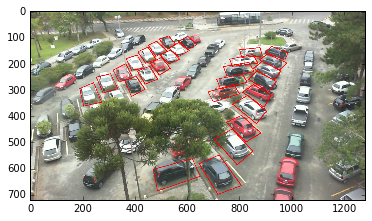

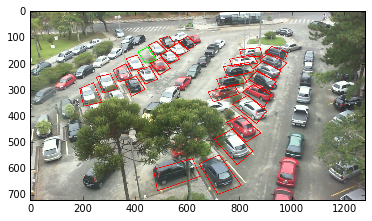

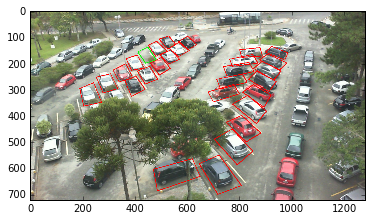

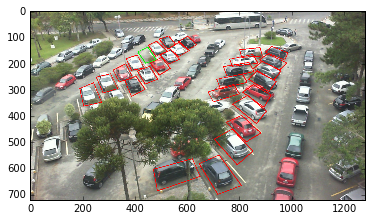

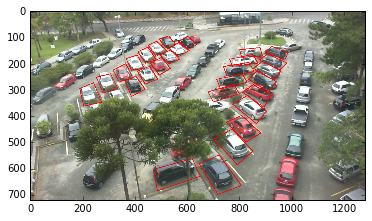

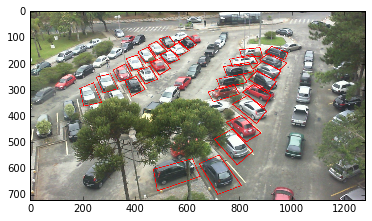

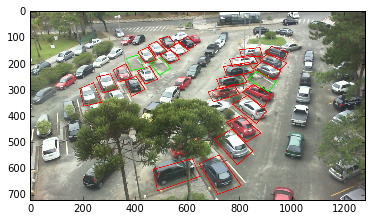

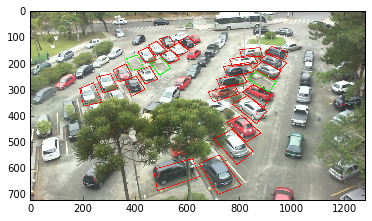

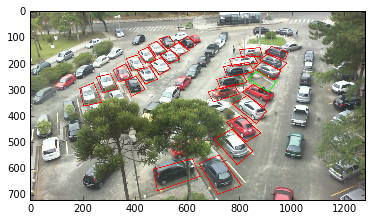

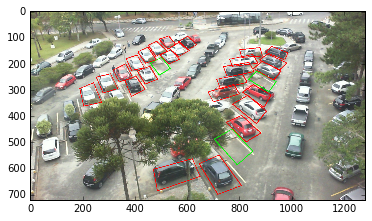

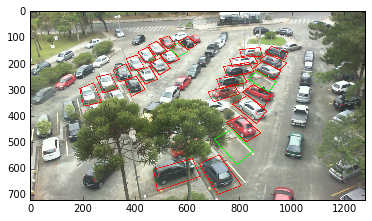

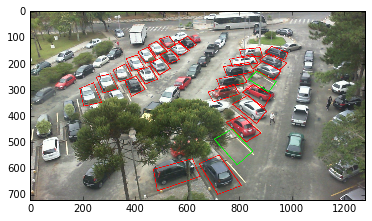

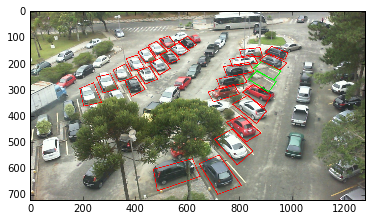

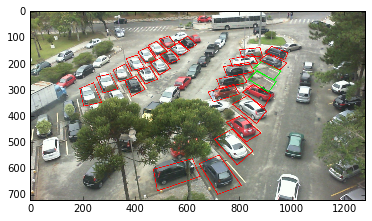

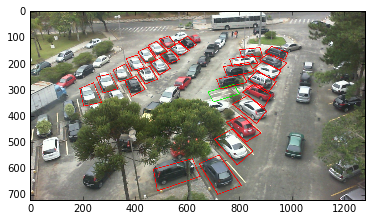

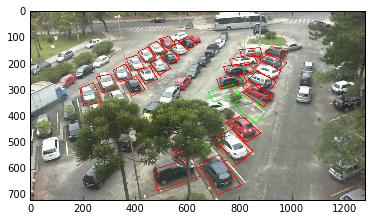

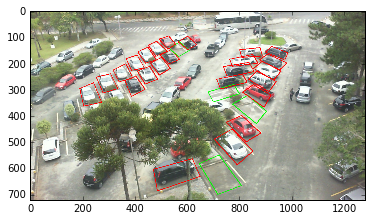

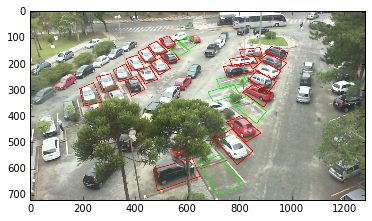

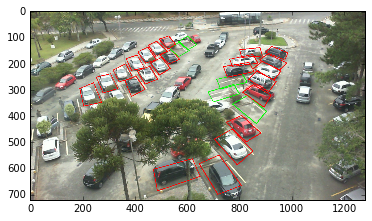

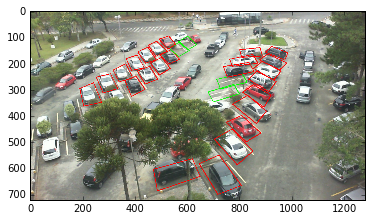

In [8]:
for k in range(100,140):
    if (k % 2 == 0):
        continue
    tree = ET.parse(file_dirs[k])
    root = tree.getroot()
    x_val = []
    for child in root:
        if (child.get('occupied') == '1' or child.get('occupied') == '0'):
            occupied, x, y, w, h, d = getInfo(child)
            img = cv2.imread(file_dirs[k - 1], cv2.IMREAD_COLOR)
            patch = subimage(img, (x, y), d, w, h)
            patch = cv2.resize(patch, (64, 48))
            patch = cv2.cvtColor(patch, cv2.COLOR_BGR2RGB)
            x_val.append(patch)
    x_val = np.array(x_val)
    x_val = x_val.astype('float32')
    x_val /= 255
    prediction = np.round(model.predict(x_val))
    for i in range(len(x_val)):
        cnt = []
        for j in range(4):
            x = root[i][1][j].get('x')
            y = root[i][1][j].get('y')
            cnt.append([x, y])
        cnt = np.array(cnt, dtype=np.int32)
        if (prediction[i][0] == 1):
            cv2.drawContours(img, [cnt], -1, (0, 255, 0), 2)
        else:
            cv2.drawContours(img, [cnt], -1, (0, 0, 255), 2)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.show()